In [4]:
import pandas as pd
import seaborn as sns
import datetime
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
)
import seaborn as sns
from sklearn import linear_model
import pandas as pd
import numpy as np
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
import random
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("DS_CaseStudy_Churn_Pred_Data.csv")

In [3]:
df.shape

(9004901, 17)

In [161]:
df[df['passengerid'] == 107025]

delay  created_date  pickup_date  distance  driver_rating  \
357111        NaN      20190828          NaN       NaN            NaN   
3901571      0.47      20190828   20190828.0      0.01            NaN   
6125725  47310.65      20190829   20191001.0     63.35            NaN   

             fare  discount  payment_method promocode  taximodelid  \
357111        NaN       NaN             1.0       NaN            1   
3901571     51.18       0.0             1.0       NaN            1   
6125725  26504.22       0.0             1.0       NaN            1   

         travel_status  trip_fare  profile_created  \
357111               8        NaN         20190828   
3901571              1      51.18         20190828   
6125725              1   26504.22         20190828   

                       status_description  pre_booked  passengerid   tripid  
357111   Driver & Dispatcher Cancellation           0       107025  3675948  
3901571                         Completed           0       107025  6881121  
6125725                         Completed           0       107025  3123002

In [4]:
df.head()

delay  created_date  pickup_date  distance  driver_rating    fare  \
0    NaN      20190809          NaN       NaN            NaN     NaN   
1   8.38      20190701   20190701.0     16.49            NaN  676.13   
2  16.45      20190830   20190830.0     14.39            NaN  836.63   
3    NaN      20190709          NaN       NaN            NaN     NaN   
4    NaN      20190718          NaN       NaN            NaN     NaN   

   discount  payment_method promocode  taximodelid  travel_status  trip_fare  \
0       NaN             1.0       NaN            1             12        NaN   
1       0.0             1.0       NaN            1              1     676.13   
2       0.0             1.0       NaN            2              1     836.63   
3       NaN             1.0     lpp42            1             12        NaN   
4       NaN             1.0      abac            4             12        NaN   

   profile_created status_description  pre_booked  passengerid   tripid  
0         20170223        Unavailable           0       107206  7542464  
1         20180201          Completed           0       123034  6044316  
2         20180905          Completed           0       201136  1959290  
3         20180113        Unavailable           0       403293  1250879  
4         20190702        Unavailable           0       448530   884375

#### Dealing with missing values

In [5]:
# checking missing value percentage in each variable

p = df.isnull().sum() * 100 / len(df)
m_df = pd.DataFrame({'name': df.columns,
                                 'missing': p})
m_df

name     missing
delay                            delay   56.389282
created_date              created_date    0.000000
pickup_date                pickup_date   56.389282
distance                      distance   56.432247
driver_rating            driver_rating  100.000000
fare                              fare   56.432247
discount                      discount   56.432247
payment_method          payment_method    0.000078
promocode                    promocode   78.443605
taximodelid                taximodelid    0.000000
travel_status            travel_status    0.000000
trip_fare                    trip_fare   56.432247
profile_created        profile_created    0.000000
status_description  status_description    0.000000
pre_booked                  pre_booked    0.000000
passengerid                passengerid    0.000000
tripid                          tripid    0.000000

In [6]:
# there is a variable where all the observations are missing. Also a variable with more than 70% mising values

# we can drop that variable

df_edited = df.drop(["driver_rating" ,"promocode"], axis = 1)

In [7]:
df_edited.head()

delay  created_date  pickup_date  distance    fare  discount  \
0    NaN      20190809          NaN       NaN     NaN       NaN   
1   8.38      20190701   20190701.0     16.49  676.13       0.0   
2  16.45      20190830   20190830.0     14.39  836.63       0.0   
3    NaN      20190709          NaN       NaN     NaN       NaN   
4    NaN      20190718          NaN       NaN     NaN       NaN   

   payment_method  taximodelid  travel_status  trip_fare  profile_created  \
0             1.0            1             12        NaN         20170223   
1             1.0            1              1     676.13         20180201   
2             1.0            2              1     836.63         20180905   
3             1.0            1             12        NaN         20180113   
4             1.0            4             12        NaN         20190702   

  status_description  pre_booked  passengerid   tripid  
0        Unavailable           0       107206  7542464  
1          Completed           0       123034  6044316  
2          Completed           0       201136  1959290  
3        Unavailable           0       403293  1250879  
4        Unavailable           0       448530   884375

In [8]:
df_edited[df_edited.isnull().sum(axis=1) == 7]

delay  created_date  pickup_date  distance  fare  discount  \
1317384    NaN      20190809          NaN       NaN   NaN       NaN   
1828079    NaN      20190831          NaN       NaN   NaN       NaN   
4786282    NaN      20190829          NaN       NaN   NaN       NaN   
5043960    NaN      20190809          NaN       NaN   NaN       NaN   
7070383    NaN      20190809          NaN       NaN   NaN       NaN   
8307780    NaN      20190819          NaN       NaN   NaN       NaN   
8397525    NaN      20190815          NaN       NaN   NaN       NaN   

         payment_method  taximodelid  travel_status  trip_fare  \
1317384             NaN            1             12        NaN   
1828079             NaN            1              6        NaN   
4786282             NaN            1              6        NaN   
5043960             NaN            1             12        NaN   
7070383             NaN            1             12        NaN   
8307780             NaN            1              6        NaN   
8397525             NaN            1              4        NaN   

         profile_created                status_description  pre_booked  \
1317384         20180609                       Unavailable           0   
1828079         20190801    Passenger Cancel Before Accept           0   
4786282         20160329    Passenger Cancel Before Accept           0   
5043960         20180609                       Unavailable           0   
7070383         20180609                       Unavailable           0   
8307780         20161217    Passenger Cancel Before Accept           0   
8397525         20150825  Cancel By Passenger After Accept           0   

         passengerid   tripid  
1317384       196490  8891407  
1828079        97133  7490799  
4786282        53048  8772415  
5043960       196490  6070621  
7070383       196490  6779061  
8307780        65536  8580100  
8397525       507271  3469301

In [9]:
# there were more than 50% missing values for 6 variables. 4 variables had same amount of mising values for same customers.

# Thus, it was decided to move on with non-missing data ratther than removing the whole variables.

In [11]:
# build a model which will predict whether a customer will move out of PickMe 
# platform in an upcoming month or will go dormant, we can call this as a "customer churning"

In [12]:
df_edited[df_edited['trip_fare'].isnull()]

delay  created_date  pickup_date  distance  fare  discount  \
0          NaN      20190809          NaN       NaN   NaN       NaN   
3          NaN      20190709          NaN       NaN   NaN       NaN   
4          NaN      20190718          NaN       NaN   NaN       NaN   
5          NaN      20190824          NaN       NaN   NaN       NaN   
9          NaN      20190729          NaN       NaN   NaN       NaN   
...        ...           ...          ...       ...   ...       ...   
9004890    NaN      20190706          NaN       NaN   NaN       NaN   
9004892    NaN      20190718          NaN       NaN   NaN       NaN   
9004898    NaN      20190617          NaN       NaN   NaN       NaN   
9004899    NaN      20190605          NaN       NaN   NaN       NaN   
9004900    NaN      20190820          NaN       NaN   NaN       NaN   

         payment_method  taximodelid  travel_status  trip_fare  \
0                   1.0            1             12        NaN   
3                   1.0            1             12        NaN   
4                   1.0            4             12        NaN   
5                   1.0            1              4        NaN   
9                   1.0            1             12        NaN   
...                 ...          ...            ...        ...   
9004890             1.0            1              4        NaN   
9004892             1.0            1             12        NaN   
9004898             1.0            1              4        NaN   
9004899             1.0            1              4        NaN   
9004900             1.0            1              6        NaN   

         profile_created                status_description  pre_booked  \
0               20170223                       Unavailable           0   
3               20180113                       Unavailable           0   
4               20190702                       Unavailable           0   
5               20190101  Cancel By Passenger After Accept           0   
9               20190624                       Unavailable           0   
...                  ...                               ...         ...   
9004890         20190607  Cancel By Passenger After Accept           0   
9004892         20160715                       Unavailable           0   
9004898         20171224  Cancel By Passenger After Accept           0   
9004899         20190313  Cancel By Passenger After Accept           0   
9004900         20160310    Passenger Cancel Before Accept           0   

         passengerid   tripid  
0             107206  7542464  
3             403293  1250879  
4             448530   884375  
5             153263   836357  
9             485794  5434628  
...              ...      ...  
9004890        57824  2054605  
9004892        15783  4370386  
9004898       262558  5546605  
9004899        53340  2811519  
9004900        37313  6131719  

[5081668 rows x 15 columns]

In [13]:
# there are four variables with equal percenatge of missing values

In [14]:
df_new = df_edited.dropna()

In [15]:
# converting the variables into correct type

df_new.head()

delay  created_date  pickup_date  distance     fare  discount  \
1   8.38      20190701   20190701.0     16.49   676.13      0.00   
2  16.45      20190830   20190830.0     14.39   836.63      0.00   
6  20.27      20190619   20190619.0     57.34  2606.82   2606.82   
7  28.10      20190830   20190830.0     50.57  2512.90      0.00   
8   0.93      20190624   20190624.0      9.68   423.91      0.00   

   payment_method  taximodelid  travel_status  trip_fare  profile_created  \
1             1.0            1              1     676.13         20180201   
2             1.0            2              1     836.63         20180905   
6             1.0            4              1       0.00         20190105   
7             1.0            4              1    2512.90         20180522   
8             1.0            1              1     423.91         20170203   

  status_description  pre_booked  passengerid   tripid  
1          Completed           0       123034  6044316  
2          Completed           0       201136  1959290  
6          Completed           0       219991  3532976  
7          Completed           0        17052  7920023  
8          Completed           0        16041  8903870

In [16]:
df_new.dtypes

delay                 float64
created_date            int64
pickup_date           float64
distance              float64
fare                  float64
discount              float64
payment_method        float64
taximodelid             int64
travel_status           int64
trip_fare             float64
profile_created         int64
status_description     object
pre_booked              int64
passengerid             int64
tripid                  int64
dtype: object

In [17]:
# created date

df_new['created_date'] = df_new['created_date'].astype('str')
create_date = []
for s in df_new['created_date']:
    s_datetime = datetime.datetime.strptime(s, '%Y%m%d')
    create_date.append(s_datetime)

C:\Users\Sandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
d = []
for i in create_date:
    c_date = i.date()
    a = c_date.isoformat()
    d.append(a)

In [19]:
df_new['created_date'] = d

C:\Users\Sandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_new.head()

delay created_date  pickup_date  distance     fare  discount  \
1   8.38   2019-07-01   20190701.0     16.49   676.13      0.00   
2  16.45   2019-08-30   20190830.0     14.39   836.63      0.00   
6  20.27   2019-06-19   20190619.0     57.34  2606.82   2606.82   
7  28.10   2019-08-30   20190830.0     50.57  2512.90      0.00   
8   0.93   2019-06-24   20190624.0      9.68   423.91      0.00   

   payment_method  taximodelid  travel_status  trip_fare  profile_created  \
1             1.0            1              1     676.13         20180201   
2             1.0            2              1     836.63         20180905   
6             1.0            4              1       0.00         20190105   
7             1.0            4              1    2512.90         20180522   
8             1.0            1              1     423.91         20170203   

  status_description  pre_booked  passengerid   tripid  
1          Completed           0       123034  6044316  
2          Completed           0       201136  1959290  
6          Completed           0       219991  3532976  
7          Completed           0        17052  7920023  
8          Completed           0        16041  8903870

In [21]:
df_new['pickup_date'] = df_new['pickup_date'].astype('str')
new_pickup_date = []
for i in df_new['pickup_date']:
    s = i[:-2]
    new_pickup_date.append(s)

C:\Users\Sandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_new['pickup_date'] = new_pickup_date

C:\Users\Sandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_new.head()

delay created_date pickup_date  distance     fare  discount  \
1   8.38   2019-07-01    20190701     16.49   676.13      0.00   
2  16.45   2019-08-30    20190830     14.39   836.63      0.00   
6  20.27   2019-06-19    20190619     57.34  2606.82   2606.82   
7  28.10   2019-08-30    20190830     50.57  2512.90      0.00   
8   0.93   2019-06-24    20190624      9.68   423.91      0.00   

   payment_method  taximodelid  travel_status  trip_fare  profile_created  \
1             1.0            1              1     676.13         20180201   
2             1.0            2              1     836.63         20180905   
6             1.0            4              1       0.00         20190105   
7             1.0            4              1    2512.90         20180522   
8             1.0            1              1     423.91         20170203   

  status_description  pre_booked  passengerid   tripid  
1          Completed           0       123034  6044316  
2          Completed           0       201136  1959290  
6          Completed           0       219991  3532976  
7          Completed           0        17052  7920023  
8          Completed           0        16041  8903870

In [24]:
df_new['pickup_date'].value_counts

<bound method IndexOpsMixin.value_counts of 1          20190701
2          20190830
6          20190619
7          20190830
8          20190624
             ...   
9004893    20190714
9004894    20190828
9004895    20190602
9004896    20190711
9004897    20190815
Name: pickup_date, Length: 3923215, dtype: object>

In [25]:
# drop rows with n as a date
df_new = df_new.drop(df_new[df_new['pickup_date']== 'n'].index)

In [26]:
# pickup date

pick_date = []
for s in df_new['pickup_date']:
    s_datetime = datetime.datetime.strptime(s, '%Y%m%d')
    pick_date.append(s_datetime)

In [27]:
d = []
for i in pick_date:
    c_date = i.date()
    a = c_date.isoformat()
    d.append(a)

In [28]:
df_new['pickup_date'] = d

In [29]:
df_new

delay created_date pickup_date  distance     fare  discount  \
1         8.38   2019-07-01  2019-07-01     16.49   676.13      0.00   
2        16.45   2019-08-30  2019-08-30     14.39   836.63      0.00   
6        20.27   2019-06-19  2019-06-19     57.34  2606.82   2606.82   
7        28.10   2019-08-30  2019-08-30     50.57  2512.90      0.00   
8         0.93   2019-06-24  2019-06-24      9.68   423.91      0.00   
...        ...          ...         ...       ...      ...       ...   
9004893   3.27   2019-07-14  2019-07-14      1.90    94.01     37.60   
9004894   2.42   2019-08-28  2019-08-28      2.60   121.34      0.00   
9004895   6.22   2019-06-02  2019-06-02      2.22   105.94      0.00   
9004896  10.23   2019-07-11  2019-07-11      9.95   423.55      0.00   
9004897  11.22   2019-08-15  2019-08-15     16.14  1103.80      0.00   

         payment_method  taximodelid  travel_status  trip_fare  \
1                   1.0            1              1     676.13   
2                   1.0            2              1     836.63   
6                   1.0            4              1       0.00   
7                   1.0            4              1    2512.90   
8                   1.0            1              1     423.91   
...                 ...          ...            ...        ...   
9004893             1.0            1              1      56.40   
9004894             1.0            1              1     121.34   
9004895             1.0            1              1     105.94   
9004896             1.0            1              1     423.55   
9004897             1.0            2              1    1103.80   

         profile_created status_description  pre_booked  passengerid   tripid  
1               20180201          Completed           0       123034  6044316  
2               20180905          Completed           0       201136  1959290  
6               20190105          Completed           0       219991  3532976  
7               20180522          Completed           0        17052  7920023  
8               20170203          Completed           0        16041  8903870  
...                  ...                ...         ...          ...      ...  
9004893         20160409          Completed           0       464966   647904  
9004894         20190614          Completed           0       474026  5545164  
9004895         20181108          Completed           0       280002  5928699  
9004896         20180205          Completed           0        73976  7088109  
9004897         20190630          Completed           0       225432  8539669  

[3923215 rows x 15 columns]

In [30]:
# thus the two variables are equal for every observation. That canbe removed

In [31]:
comparison = np.where(df_new["created_date"] == df_new["pickup_date"], True, False)
comparison = comparison.tolist()
df_new['comparison_column'] = comparison
df_new['comparison_column'].value_counts()

True     3899285
False      23930
Name: comparison_column, dtype: int64

In [32]:
df_new = df_new.drop(['created_date', 'comparison_column'], axis = 1)

In [33]:
# profile created
df_new['profile_created'] = df_new['profile_created'].astype('str')
profile = []
for s in df_new['profile_created']:
    s_datetime = datetime.datetime.strptime(s, '%Y%m%d')
    profile.append(s_datetime)

In [34]:
d = []
for i in profile:
    c_date = i.date()
    a = c_date.isoformat()
    d.append(a)
    
df_new['profile_created'] = d

In [35]:
df_new.dtypes

delay                 float64
pickup_date            object
distance              float64
fare                  float64
discount              float64
payment_method        float64
taximodelid             int64
travel_status           int64
trip_fare             float64
profile_created        object
status_description     object
pre_booked              int64
passengerid             int64
tripid                  int64
dtype: object

In [36]:
df_new['pickup_date'] = pd.to_datetime(df_new['pickup_date'])
df_new['profile_created'] = pd.to_datetime(df_new['profile_created'])

In [37]:
# trip id is unique. drop it
df_new['tripid'].value_counts
df_new = df_new.drop('tripid', axis = 1)

In [38]:
df_new['status_description'] = df_new['status_description'].astype('str')

In [39]:
df_new.head()

delay pickup_date  distance     fare  discount  payment_method  \
1   8.38  2019-07-01     16.49   676.13      0.00             1.0   
2  16.45  2019-08-30     14.39   836.63      0.00             1.0   
6  20.27  2019-06-19     57.34  2606.82   2606.82             1.0   
7  28.10  2019-08-30     50.57  2512.90      0.00             1.0   
8   0.93  2019-06-24      9.68   423.91      0.00             1.0   

   taximodelid  travel_status  trip_fare profile_created status_description  \
1            1              1     676.13      2018-02-01          Completed   
2            2              1     836.63      2018-09-05          Completed   
6            4              1       0.00      2019-01-05          Completed   
7            4              1    2512.90      2018-05-22          Completed   
8            1              1     423.91      2017-02-03          Completed   

   pre_booked  passengerid  
1           0       123034  
2           0       201136  
6           0       219991  
7           0        17052  
8           0        16041

In [40]:
df_new['passengerid'].value_counts()

140928    1000
111844     803
516864     598
65258      501
20860      499
          ... 
187579       1
189628       1
191677       1
74948        1
2047         1
Name: passengerid, Length: 463307, dtype: int64

In [42]:
df_new.to_csv("df_new_final.csv")

In [43]:
df1 = df_new.groupby('passengerid').size().reset_index(name='count')

In [44]:
df1

passengerid  count
0                 2      5
1                 4      2
2                 5      2
3                 6      1
4                 7    100
...             ...    ...
463302       528739      3
463303       528740      3
463304       528741      6
463305       528742      7
463306       528743      4

[463307 rows x 2 columns]

In [45]:
df_grouped = df_new.sort_values(by=['pickup_date']).drop_duplicates(subset='passengerid', keep = 'last')
df_grouped = df_grouped[['pickup_date', 'passengerid']]
df_grouped['last_trip_date'] = df_grouped['pickup_date']
df_grouped = df_grouped.drop('pickup_date', axis = 1)
df_grouped

passengerid last_trip_date
2016793       280716     2019-06-01
1253806       196868     2019-06-01
2612582        86895     2019-06-01
2549019       303246     2019-06-01
5916680       451701     2019-06-01
...              ...            ...
4810589        39988     2019-09-06
6911721       273679     2019-09-06
8919150       491421     2019-09-08
4669501        46478     2019-09-09
6125725       107025     2019-10-01

[463307 rows x 2 columns]

In [46]:
df_grouped2 = df_new.sort_values(by=['pickup_date']).drop_duplicates(subset='passengerid', keep = 'first')
df_grouped2 = df_grouped2[['pickup_date', 'passengerid']]
df_grouped2['first_trip_date'] = df_grouped2['pickup_date']
df_grouped2 = df_grouped2.drop('pickup_date', axis = 1)
df_grouped2

passengerid first_trip_date
571369         49777      2019-06-01
3760831       467044      2019-06-01
1495496        82183      2019-06-01
6221648        46517      2019-06-01
3921585       219927      2019-06-01
...              ...             ...
1438426       213403      2019-09-02
5084811       293973      2019-09-02
3048828       444587      2019-09-03
7267206       226329      2019-09-05
4669501        46478      2019-09-09

[463307 rows x 2 columns]

In [47]:
df_grouped = pd.merge(df1, df_grouped, on="passengerid")

In [48]:
df_groupes_Added = pd.merge(df_grouped2, df_grouped, on="passengerid")

In [49]:
df_merged = pd.merge(df_new, df_groupes_Added, on="passengerid")

In [50]:
df_merged

delay pickup_date  distance     fare  discount  payment_method  \
0         8.38  2019-07-01     16.49   676.13      0.00             1.0   
1        13.75  2019-07-01      2.95   154.09      0.00             1.0   
2         5.62  2019-06-19      3.92   206.72      0.00             1.0   
3         1.78  2019-06-05      4.17   203.88      0.00             1.0   
4         6.58  2019-06-17      2.73   181.99      0.00             1.0   
...        ...         ...       ...      ...       ...             ...   
3923210   1.78  2019-08-12     31.45  1449.60      0.00             1.0   
3923211   7.25  2019-08-22     15.62   760.61      0.00             1.0   
3923212   0.35  2019-06-14      1.42    67.64      0.00             1.0   
3923213   3.73  2019-07-11     25.55  1155.09   1155.09             1.0   
3923214   3.45  2019-06-27      2.92   137.13      0.00             1.0   

         taximodelid  travel_status  trip_fare profile_created  \
0                  1              1     676.13      2018-02-01   
1                  1              1     154.09      2018-02-01   
2                  1              1     206.72      2018-02-01   
3                  1              1     203.88      2018-02-01   
4                  1              1     181.99      2018-02-01   
...              ...            ...        ...             ...   
3923210            4              1    1449.60      2019-08-11   
3923211            4              1     760.61      2019-06-01   
3923212            1              1      67.64      2019-06-14   
3923213            4              1       0.00      2017-03-03   
3923214            1              1     137.13      2018-05-18   

        status_description  pre_booked  passengerid first_trip_date  count  \
0                Completed           0       123034      2019-06-04     35   
1                Completed           0       123034      2019-06-04     35   
2                Completed           0       123034      2019-06-04     35   
3                Completed           0       123034      2019-06-04     35   
4                Completed           0       123034      2019-06-04     35   
...                    ...         ...          ...             ...    ...   
3923210          Completed           0       283623      2019-08-12      1   
3923211          Completed           0        64306      2019-08-22      1   
3923212          Completed           0       115510      2019-06-14      1   
3923213          Completed           0       147267      2019-07-11      1   
3923214          Completed           0       174088      2019-06-27      1   

        last_trip_date  
0           2019-08-29  
1           2019-08-29  
2           2019-08-29  
3           2019-08-29  
4           2019-08-29  
...                ...  
3923210     2019-08-12  
3923211     2019-08-22  
3923212     2019-06-14  
3923213     2019-07-11  
3923214     2019-06-27  

[3923215 rows x 16 columns]

In [51]:
datetime.timedelta(7)
df_merged['tenure'] = df_merged['last_trip_date'] - df_merged['first_trip_date']
df_merged['last_trip_date'] = pd.to_datetime(df_merged['last_trip_date'])
df_merged['profile_created'] = pd.to_datetime(df_merged['profile_created'])
df_merged['pickup_date'] = pd.to_datetime(df_merged['pickup_date'])
df_merged['days_since_last_trip'] =  (df_merged['pickup_date'].max()-df_merged['last_trip_date'])


In [61]:
datetime.timedelta(7)

# create new variable days since signup

datetime.timedelta(7)
df_merged['days_since_signup'] = (df_merged['pickup_date'].max() - df_merged['profile_created'])

df_merged['average_gaps_between_trips'] = (df_merged['tenure']/ df_merged['count']).dt.days
df_merged['days_since_signup'] = (df_merged['days_since_signup']).dt.days

In [62]:
df_merged = df_merged.drop(df_merged[df_merged['days_since_signup']==0].index)

In [65]:
df_merged = df_merged[df_merged['days_since_signup']>30]

In [66]:
df_merged.head()

delay pickup_date  distance    fare  discount  payment_method  taximodelid  \
0   8.38  2019-07-01     16.49  676.13       0.0             1.0            1   
1  13.75  2019-07-01      2.95  154.09       0.0             1.0            1   
2   5.62  2019-06-19      3.92  206.72       0.0             1.0            1   
3   1.78  2019-06-05      4.17  203.88       0.0             1.0            1   
4   6.58  2019-06-17      2.73  181.99       0.0             1.0            1   

   travel_status  trip_fare profile_created status_description  pre_booked  \
0              1     676.13      2018-02-01          Completed           0   
1              1     154.09      2018-02-01          Completed           0   
2              1     206.72      2018-02-01          Completed           0   
3              1     203.88      2018-02-01          Completed           0   
4              1     181.99      2018-02-01          Completed           0   

   passengerid first_trip_date  count last_trip_date  tenure  \
0       123034      2019-06-04     35     2019-08-29 86 days   
1       123034      2019-06-04     35     2019-08-29 86 days   
2       123034      2019-06-04     35     2019-08-29 86 days   
3       123034      2019-06-04     35     2019-08-29 86 days   
4       123034      2019-06-04     35     2019-08-29 86 days   

  days_since_last_trip  days_since_signup  average_gaps_between_trips  
0              33 days                607                           2  
1              33 days                607                           2  
2              33 days                607                           2  
3              33 days                607                           2  
4              33 days                607                           2

In [67]:
df_merged['days_since_last_trip'] = df_merged['days_since_last_trip'].dt.days
df_merged['tenure'] = df_merged['tenure'].dt.days

In [68]:
df_merged['average_gaps_between_trips'] = df_merged['average_gaps_between_trips'].astype('int')
df_merged['days_since_last_trip'] = df_merged['days_since_last_trip'].astype('int')

In [69]:
df_merged.head()

delay pickup_date  distance    fare  discount  payment_method  taximodelid  \
0   8.38  2019-07-01     16.49  676.13       0.0             1.0            1   
1  13.75  2019-07-01      2.95  154.09       0.0             1.0            1   
2   5.62  2019-06-19      3.92  206.72       0.0             1.0            1   
3   1.78  2019-06-05      4.17  203.88       0.0             1.0            1   
4   6.58  2019-06-17      2.73  181.99       0.0             1.0            1   

   travel_status  trip_fare profile_created status_description  pre_booked  \
0              1     676.13      2018-02-01          Completed           0   
1              1     154.09      2018-02-01          Completed           0   
2              1     206.72      2018-02-01          Completed           0   
3              1     203.88      2018-02-01          Completed           0   
4              1     181.99      2018-02-01          Completed           0   

   passengerid first_trip_date  count last_trip_date  tenure  \
0       123034      2019-06-04     35     2019-08-29      86   
1       123034      2019-06-04     35     2019-08-29      86   
2       123034      2019-06-04     35     2019-08-29      86   
3       123034      2019-06-04     35     2019-08-29      86   
4       123034      2019-06-04     35     2019-08-29      86   

   days_since_last_trip  days_since_signup  average_gaps_between_trips  
0                    33                607                           2  
1                    33                607                           2  
2                    33                607                           2  
3                    33                607                           2  
4                    33                607                           2

In [70]:
df_averaged = df_merged.groupby('passengerid').mean()
df_averaged = df_averaged[['distance', 'delay','fare', 'discount', 'trip_fare']]
df_averaged.columns = ['average_distance', 'average_Delay', 'average_fare', 'average_discount', 'average_trip_fare']
df_averaged = df_averaged.reset_index()

In [71]:
df_merged = pd.merge(df_averaged, df_merged, on = 'passengerid')

In [72]:
cleanup_nums = {"status_description":     {"Completed": 0, "Driver & Dispatcher Cancellation": 1}}
df_merged.replace(cleanup_nums, inplace=True)

In [73]:
df_cancellation = df_merged.groupby('passengerid').sum()
df_cancellation = df_cancellation['status_description']
df_cancellation = df_cancellation.reset_index()

In [74]:
df_merged = pd.merge(df_cancellation, df_merged, on = 'passengerid')

In [75]:
df_merged['cancellation_rate'] = df_merged['status_description_x']/ df_merged['count']

In [76]:
df_recent_payment_mode = df_new.sort_values(by=['pickup_date']).drop_duplicates(subset='passengerid', keep = 'last')
df_recent_payment_mode = df_recent_payment_mode[['passengerid', 'taximodelid','payment_method']]
df_recent_payment_mode
df_recent_payment_mode.columns = ['passengerid', 'recent_taximodelid', 'recent_payment_method']

In [77]:
df_merged

passengerid  status_description_x  average_distance  average_Delay  \
0                  2                     0            9.0460         6.6880   
1                  2                     0            9.0460         6.6880   
2                  2                     0            9.0460         6.6880   
3                  2                     0            9.0460         6.6880   
4                  2                     0            9.0460         6.6880   
...              ...                   ...               ...            ...   
3923210       528742                     0            9.3400         4.1200   
3923211       528743                     0           32.1575         7.7625   
3923212       528743                     0           32.1575         7.7625   
3923213       528743                     0           32.1575         7.7625   
3923214       528743                     0           32.1575         7.7625   

         average_fare  average_discount  average_trip_fare  delay pickup_date  \
0          360.492000               0.0         360.492000   7.57  2019-07-18   
1          360.492000               0.0         360.492000   4.25  2019-07-18   
2          360.492000               0.0         360.492000   2.90  2019-06-30   
3          360.492000               0.0         360.492000   8.17  2019-08-21   
4          360.492000               0.0         360.492000  10.55  2019-08-26   
...               ...               ...                ...    ...         ...   
3923210    368.552857               0.0         368.552857   9.58  2019-08-25   
3923211   1421.805000              25.0        1396.802500   1.42  2019-07-11   
3923212   1421.805000              25.0        1396.802500  21.15  2019-06-23   
3923213   1421.805000              25.0        1396.802500   2.15  2019-06-12   
3923214   1421.805000              25.0        1396.802500   6.33  2019-06-07   

         distance  ...  status_description_y  pre_booked  first_trip_date  \
0           10.54  ...                     0           0       2019-06-30   
1            3.88  ...                     0           0       2019-06-30   
2            1.99  ...                     0           0       2019-06-30   
3            5.07  ...                     0           0       2019-06-30   
4           23.75  ...                     0           0       2019-06-30   
...           ...  ...                   ...         ...              ...   
3923210     13.47  ...                     0           0       2019-06-19   
3923211      1.56  ...                     0           0       2019-06-07   
3923212    106.66  ...                     0           0       2019-06-07   
3923213      2.80  ...                     0           0       2019-06-07   
3923214     17.61  ...                     0           0       2019-06-07   

         count  last_trip_date  tenure days_since_last_trip  \
0            5      2019-08-26      57                   36   
1            5      2019-08-26      57                   36   
2            5      2019-08-26      57                   36   
3            5      2019-08-26      57                   36   
4            5      2019-08-26      57                   36   
...        ...             ...     ...                  ...   
3923210      7      2019-08-25      67                   37   
3923211      4      2019-07-11      34                   82   
3923212      4      2019-07-11      34                   82   
3923213      4      2019-07-11      34                   82   
3923214      4      2019-07-11      34                   82   

         days_since_signup  average_gaps_between_trips cancellation_rate  
0                      637                          11               0.0  
1                      637                          11               0.0  
2                      637                          11               0.0  
3                      637                          11               0.0  
4                      637    

In [80]:
df_merged.to_csv("merged.csv")

In [275]:
df_merged_edit = df_merged[(df_merged['delay'] >0 ) & (df_merged['delay'] < 10000 )]
df_merged_edit = df_merged[(df_merged['fare'] <10000000 ) ]
df_merged_edit = df_merged[(df_merged['fare'] <500000 ) & (df_merged['distance'] >50 ) ]
df_merged_edit = df_merged[(df_merged['discount'] <10000000 ) ]

In [277]:
data = df_merged_edit.drop(['delay',
 'pickup_date',
 'distance',
 'fare',
 'discount', 'last_trip_date', 'first_trip_date', 'pickup_date'], axis = 1)

In [278]:
data = pd.merge(df_recent_payment_mode, data, on = 'passengerid')

In [279]:
data.columns.tolist()

['passengerid',
 'recent_taximodelid',
 'recent_payment_method',
 'status_description_x',
 'average_distance',
 'average_Delay',
 'average_fare',
 'average_discount',
 'average_trip_fare',
 'payment_method',
 'taximodelid',
 'travel_status',
 'trip_fare',
 'profile_created',
 'status_description_y',
 'pre_booked',
 'count',
 'tenure',
 'days_since_last_trip',
 'days_since_signup',
 'average_gaps_between_trips',
 'cancellation_rate']

In [280]:
data = data.drop(['payment_method', 'taximodelid'], axis = 1)

In [281]:
data = data.drop(['pre_booked', 'status_description_y', 'profile_created', 'trip_fare'], axis = 1)

In [282]:
data.head(20)

passengerid  recent_taximodelid  recent_payment_method  \
0       280716                   1                    1.0   
1       196868                   1                    1.0   
2        86895                   1                    1.0   
3       303246                   4                    1.0   
4       451701                   4                    1.0   
5       352304                   1                    1.0   
6       472485                   1                    1.0   
7       372009                   1                    1.0   
8       365225                   1                    1.0   
9       142784                   1                    1.0   
10      130409                   1                    1.0   
11       67412                   4                    1.0   
12      504187                   3                    1.0   
13      164662                   1                    1.0   
14       32949                   1                    1.0   
15      199371                   1                    1.0   
16      298507                   1                    1.0   
17        9172                   4                    1.0   
18      160851                   1                    1.0   
19      171545                   4                    1.0   

    status_description_x  average_distance  average_Delay  average_fare  \
0                      0              4.09          12.27        169.44   
1                      0              7.32          17.55        298.61   
2                      0             15.70          10.30        632.78   
3                      0             12.61          21.32        639.17   
4                      0              7.23          14.07        379.08   
5                      0              8.03           3.18        309.24   
6                      0              7.49           6.50        295.81   
7                      0              1.44           5.78         78.09   
8                      0              2.41           3.83        114.75   
9                      0              0.64           6.43         75.65   
10                     0              8.66           9.35        339.69   
11                     0             14.17          11.52        674.36   
12                     0              7.29          13.37        515.03   
13                     0              4.95          17.75        207.41   
14                     0              1.26           5.18         81.84   
15                     0              5.12           0.48        220.28   
16                     0              4.60           0.10        201.84   
17                     0              2.82          -7.20        234.16   
18                     0              6.32           2.33        261.41   
19                     0             19.49           0.57       1145.65   

    average_discount  average_trip_fare travel_status  count  tenure  \
0                0.0             169.44             1      1       0   
1                0.0             298.61             1      1       0   
2                0.0             632.78             1      1       0   
3                0.0             639.17             1      1       0   
4                0.0             379.08             1      1       0   
5                0.0             309.24             1      1       0   
6                0.0             295.81             1      1       0   
7                0.0              78.09             1      1       0   
8                0.0             114.75             1      1       0   
9                0.0              75.65             1      1       0   
10               0.0             339.69             1      1       0   
11               0.0             674.36             1      1       0   
12               0.0             515.03             1      1       0   
13               0.0             207.41             1      1       0   
14               0.0              81.84             1      1     

In [235]:
df_merged['passengerid'] = df_merged['passengerid'].astype('category')
df_merged['travel_status'] = df_merged['travel_status'].astype('category')

In [236]:
# examine for outliers
df_merged.describe()

status_description_x  average_distance  average_Delay  average_fare  \
count          3.923215e+06      3.923215e+06   3.923215e+06  3.923215e+06   
mean           3.604442e-03      8.204400e+00   7.831587e+00  3.388930e+03   
std            6.155272e-02      1.566963e+01   2.076882e+01  3.435068e+05   
min            0.000000e+00      0.000000e+00  -1.130771e+03  0.000000e+00   
25%            0.000000e+00      4.360000e+00   5.901923e+00  2.073079e+02   
50%            0.000000e+00      6.703333e+00   7.335263e+00  3.118195e+02   
75%            0.000000e+00      1.001917e+01   9.075510e+00  4.723518e+02   
max            2.000000e+00      1.955949e+04   2.365556e+04  1.786262e+08   

       average_discount  average_trip_fare         delay      distance  \
count      3.923215e+06       3.923215e+06  3.923215e+06  3.923215e+06   
mean       1.977585e+02       3.191172e+03  7.831587e+00  8.204400e+00   
std        4.332634e+04       3.407650e+05  4.988278e+01  2.360422e+01   
min        0.000000e+00       0.000000e+00 -4.463897e+04  0.000000e+00   
25%        0.000000e+00       1.660217e+02  4.230000e+00  2.870000e+00   
50%        6.756757e-01       2.732136e+02  6.570000e+00  5.400000e+00   
75%        2.288714e+01       4.226233e+02  9.820000e+00  1.013000e+01   
max        1.374162e+07       1.786262e+08  4.731065e+04  3.909662e+04   

               fare      discount  ...   taximodelid     trip_fare  \
count  3.923215e+06  3.923215e+06  ...  3.923215e+06  3.923215e+06   
mean   3.388930e+03  1.977585e+02  ...  1.545714e+00  3.191172e+03   
std    1.293537e+06  2.705486e+05  ...  1.731318e+00  1.264928e+06   
min    0.000000e+00  0.000000e+00  ...  1.000000e+00  0.000000e+00   
25%    1.447500e+02  0.000000e+00  ...  1.000000e+00  1.090500e+02   
50%    2.509900e+02  0.000000e+00  ...  1.000000e+00  2.133400e+02   
75%    4.581700e+02  0.000000e+00  ...  1.000000e+00  4.056400e+02   
max    7.754609e+08  5.358780e+08  ...  2.400000e+01  7.754609e+08   

       status_description_y    pre_booked         count        tenure  \
count          3.923215e+06  3.923215e+06  3.923215e+06  3.923215e+06   
mean           5.378242e-05  1.826002e-02  3.411026e+01  6.693818e+01   
std            7.333454e-03  1.338903e-01  4.398257e+01  2.684144e+01   
min            0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
25%            0.000000e+00  0.000000e+00  9.000000e+00  5.500000e+01   
50%            0.000000e+00  0.000000e+00  2.000000e+01  7.800000e+01   
75%            0.000000e+00  0.000000e+00  4.400000e+01  8.700000e+01   
max            1.000000e+00  1.000000e+00  1.000000e+03  9.500000e+01   

       days_since_last_trip  days_since_signup  average_gaps_between_trips  \
count          3.923215e+06       3.923215e+06                3.923215e+06   
mean           4.295417e+01       5.529699e+02                3.628359e+00   
std            1.785380e+01       4.411225e+02                4.165828e+00   
min            0.000000e+00       3.100000e+01                0.000000e+00   
25%            3.200000e+01       1.250000e+02                1.000000e+00   
50%            3.500000e+01       4.290000e+02                2.000000e+00   
75%            4.600000e+01       8.930000e+02                5.000000e+00   
max            1.220000e+02       1.619000e+03                4.500000e+01   

       cancellation_rate  
count       3.923215e+06  
mean        5.378242e-05  
std         2.417054e-03  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         1.000000e+00  

[8 rows x 21 columns]

In [239]:
df_merged[df_merged['delay'] <0]

passengerid  status_description_x  average_distance  average_Delay  \
268              31                     0         12.396667       2.798333   
435              61                     0         18.640000       8.220000   
443              61                     0         18.640000       8.220000   
591              83                     0         10.291429       6.440000   
811             110                     0         29.727500       4.795833   
...             ...                   ...               ...            ...   
3923019      528712                     0         21.911176       3.287647   
3923021      528712                     0         21.911176       3.287647   
3923027      528712                     0         21.911176       3.287647   
3923028      528712                     0         21.911176       3.287647   
3923031      528712                     0         21.911176       3.287647   

         average_fare  average_discount  average_trip_fare  delay pickup_date  \
268        727.575000         58.333333         669.241667  -2.90  2019-06-30   
435        947.642727        572.909091         374.733636  -6.20  2019-06-19   
443        947.642727        572.909091         374.733636  -0.20  2019-08-27   
591        558.401429         42.085714         516.315714  -3.53  2019-06-30   
811       1432.029167         23.123333        1408.905000  -0.70  2019-08-05   
...               ...               ...                ...    ...         ...   
3923019   1246.331176       1246.331176           0.000000 -19.82  2019-07-30   
3923021   1246.331176       1246.331176           0.000000  -7.37  2019-07-12   
3923027   1246.331176       1246.331176           0.000000 -18.53  2019-07-23   
3923028   1246.331176       1246.331176           0.000000  -4.58  2019-07-29   
3923031   1246.331176       1246.331176           0.000000  -0.35  2019-08-06   

         distance  ...  status_description_y  pre_booked  first_trip_date  \
268         33.54  ...                     0           1       2019-06-20   
435         20.06  ...                     0           1       2019-06-16   
443         27.64  ...                     0           1       2019-06-16   
591         11.18  ...                     0           0       2019-06-12   
811        195.96  ...                     0           1       2019-07-24   
...           ...  ...                   ...         ...              ...   
3923019     26.38  ...                     0           1       2019-06-24   
3923021     21.46  ...                     0           1       2019-06-24   
3923027     23.37  ...                     0           1       2019-06-24   
3923028     21.99  ...                     0           1       2019-06-24   
3923031     20.90  ...                     0           1       2019-06-24   

         count last_trip_date  tenure days_since_last_trip  days_since_signup  \
268          6     2019-08-10      51                   52               1242   
435         11     2019-08-27      72                   35               1063   
443         11     2019-08-27      72                   35               1063   
591          7     2019-07-27      45                   66                957   
811         12     2019-08-31      38                   31                 71   
...        ...            ...     ...                  ...                ...   
3923019     17     2019-08-29      66                   33                356   
3923021     17     2019-08-29      66                   33                356   
3923027     17     2019-08-29      66                   33                356   
3923028     17     2019-08-29      66                   33                356   
3923031     17     2019-08-29      66                   33                356   

         average_gaps_between_trips cancellation_rate  
268                               8               0.0  
435                               6               0.0  
443                             

<AxesSubplot:xlabel='delay'>

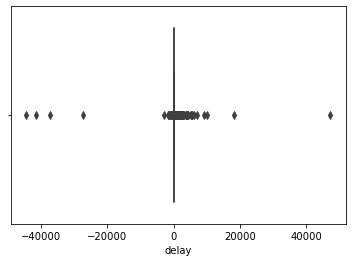

In [244]:
sns.boxplot(df_merged['delay'])

<AxesSubplot:xlabel='distance'>

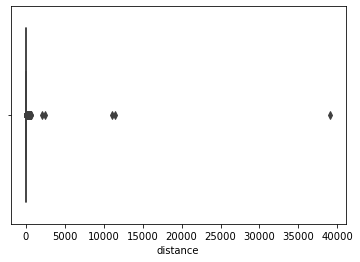

In [245]:
sns.boxplot(df_merged['distance'])

# considering the taxi fare, it is not an outlier

<AxesSubplot:xlabel='trip_fare'>

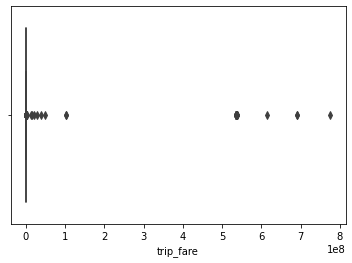

In [425]:
sns.boxplot(df_merged['trip_fare'])

<AxesSubplot:xlabel='fare'>

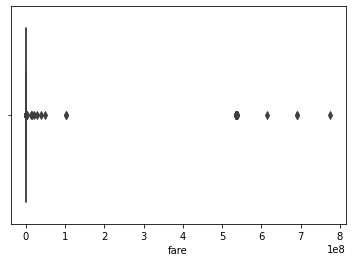

In [250]:
sns.boxplot(df_merged['fare'])

<AxesSubplot:xlabel='discount'>

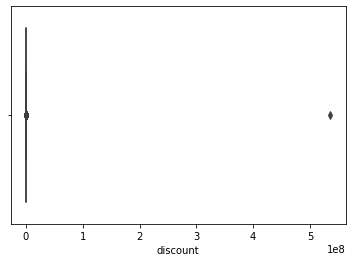

In [272]:
sns.boxplot(df_merged['discount'])

In [ ]:
# fair have outliers since the distance is lower with comapred to the fare. A taxi must have a
# high waiting time like days to get that much of a fare

In [252]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [257]:
df_merged[df_merged['fare']>100000000]

passengerid  status_description_x  average_distance  average_Delay  \
184214        25240                     0          2.882500       6.977500   
236963        32244                     0          6.333333       8.510000   
972653       131046                     0          9.635500      14.816500   
1173835      157888                     0          4.163750       7.600000   
1183076      159120                     0         31.591795       5.393333   
1451791      195418                     0          9.460690       6.850690   
1554536      209185                     0         11.028485       8.213030   
1999660      268798                     0          5.631538       4.960769   
2072463      278657                     0          8.135000       7.940000   
2080732      279834                     0         19.385000      10.063125   
2296415      308870                     0         11.002162      11.190000   
2475541      333092                     0         12.287000       8.126333   
2566303      345260                     0          6.529016       4.219016   
2568595      345505                     0          9.739065      10.435683   
2971163      400073                     0          3.154167       6.176667   
3326626      448393                     0          8.289583       7.043333   
3345314      450702                     0         10.864831       8.667640   
3456701      465611                     0          4.240000       7.195000   
3537756      476832                     0          3.379231       4.354615   
3628613      489243                     0          5.750000       7.209500   
3725661      501971                     0          7.969000       7.483000   
3860973      520221                     0         10.682889       8.535556   

         average_fare  average_discount  average_trip_fare  delay pickup_date  \
184214   1.339696e+08      6.250000e+01       1.339695e+08   6.73  2019-07-24   
236963   1.786262e+08      0.000000e+00       1.786262e+08  10.83  2019-07-24   
972653   3.877374e+07      0.000000e+00       3.877374e+07  13.38  2019-07-22   
1173835  1.263261e+07      3.125000e+01       1.263258e+07   4.55  2019-07-20   
1183076  1.374218e+07      1.374162e+07       5.600103e+02  17.85  2019-07-23   
1451791  3.485225e+06      0.000000e+00       3.485225e+06  13.27  2019-07-20   
1554536  1.623916e+07      0.000000e+00       1.623916e+07   3.23  2019-07-27   
1999660  4.136672e+07      0.000000e+00       4.136672e+07   4.45  2019-07-24   
2072463  8.931329e+07      2.500000e+01       8.931327e+07   8.30  2019-07-23   
2080732  3.349338e+07      0.000000e+00       3.349338e+07   6.38  2019-07-27   
2296415  1.453382e+07      1.811973e+01       1.453380e+07   5.27  2019-07-25   
2475541  1.786309e+07      0.000000e+00       1.786309e+07   4.02  2019-07-24   
2566303  8.785153e+06      3.779148e+01       8.785115e+06   3.00  2019-07-28   
2568595  4.977151e+06      0.000000e+00       4.977151e+06  13.35  2019-07-23   
2971163  4.482252e+07      0.000000e+00       4.482252e+07   9.57  2019-07-23   
3326626  2.232858e+07      0.000000e+00       2.232858e+07   5.63  2019-07-23   
3345314  7.773053e+06      0.000000e+00       7.773053e+06   7.55  2019-07-23   
3456701  3.361405e+07      2.189062e+01       3.361403e+07   7.88  2019-08-01   
3537756  4.122152e+07      3.202231e+01       4.122149e+07   1.73  2019-07-22   
3628613  2.679415e+07      0.000000e+00       2.679415e+07   9.60  2019-07-25   
3725661  5.358812e+07      2.572500e+01       5.358810e+07   8.98  2019-07-23   
3860973  1.365160e+07      0.000000e+00       1.365160e+07  10.23  2019-07-29   

         distance          fare      discount  payment_method  taximodelid  \
184214       3.83  5.358780e+08  0.000000e+00             1.0            1   
236963       7.87  5.358782e+08  0.000000e+00             1.0            1   
972653      10.71  7.754609e+08  0.000000e+00             1.0            2   
1173835      1.53  1.010595e+08  1.00

In [273]:
df_merged_edit = df_merged[(df_merged['delay'] >0 ) & (df_merged['delay'] < 10000 )]
df_merged_edit = df_merged[(df_merged['fare'] <10000000 ) ]
df_merged_edit = df_merged[(df_merged['fare'] <500000 ) & (df_merged['distance'] >50 ) ]
df_merged_edit = df_merged[(df_merged['discount'] <10000000 ) ]

In [271]:
df_merged_edit[df_merged_edit['']> 40000]

passengerid  status_description_x  average_distance  average_Delay  \
397519        53668                     0         58.791905      12.721429   
473997        64158                     0        450.370000     109.550000   
593164        80169                     0         16.311481      15.657778   
1017812      137514                     0        130.708235       7.790588   
1098977      148221                     0        128.511304      11.895326   
2616990      351745                     0         36.235000       6.450000   
2727460      366880                     0        672.950000      49.050000   
2846904      383363                     0        319.516250      13.465000   
3200245      431382                     0        957.724167       8.772500   

         average_fare  average_discount  average_trip_fare   delay  \
397519    4927.810476       4927.810476           0.000000   18.80   
473997   93863.550000          0.000000       93863.550000  109.55   
593164    3094.867778         10.338889        3084.528519   22.18   
1017812   5581.610000          0.000000        5581.610000    7.85   
1098977   4626.855543          0.000000        4626.855543    5.45   
2616990  32970.705000      32970.705000           0.000000    2.80   
2727460  44658.050000          0.000000       44658.050000   49.05   
2846904  13540.047500          0.000000       13540.047500    7.40   
3200245  33581.184167         21.657500       33559.525833   13.00   

        pickup_date  distance       fare  discount  payment_method  \
397519   2019-06-28     63.15   45556.32  45556.32             1.0   
473997   2019-07-10    450.37   93863.55      0.00             1.0   
593164   2019-06-15    126.75   67193.11      0.00             1.0   
1017812  2019-06-17   2082.68   87569.71      0.00             1.0   
1098977  2019-06-06  11056.67  387054.76      0.00             1.0   
2616990  2019-07-02     71.62   40848.23  40848.23             1.0   
2727460  2019-09-01    672.95   44658.05      0.00             1.0   
2846904  2019-08-15   2421.39  101768.62      0.00             1.0   
3200245  2019-07-14  11408.39  399345.48      0.00             1.0   

         taximodelid travel_status  trip_fare profile_created  \
397519             2             1       0.00      2017-12-20   
473997             1             1   93863.55      2019-07-10   
593164             2             1   67193.11      2016-11-11   
1017812            4             1   87569.71      2017-12-07   
1098977            1             1  387054.76      2019-03-01   
2616990            4             1       0.00      2019-07-02   
2727460            2             1   44658.05      2019-08-31   
2846904            4             1  101768.62      2018-08-10   
3200245            1             1  399345.48      2018-03-25   

         status_description_y  pre_booked first_trip_date  count  \
397519                      0           0      2019-06-02     21   
473997                      0           0      2019-07-10      1   
593164                      0           0      2019-06-14     27   
1017812                     0           0      2019-06-05     17   
1098977                     0           0      2019-06-01     92   
2616990                     0           0      2019-07-02      2   
2727460                     0           1      2019-09-01      1   
2846904                     0           0      2019-06-06      8   
3200245                     0           0      2019-06-08     12   

        last_trip_date  tenure  days_since_last_trip  days_since_signup  \
397519      2019-08-26      85                    36                650   
473997      2019-07-10       0                    83                 83   
593164      2019-08-28      75                    34               1054   
1017812     2019-08-22      78                    40                663   
1098977     2019-08-31      91                    31                214   
2616990     2019-07-02       0             

<AxesSubplot:xlabel='discount'>

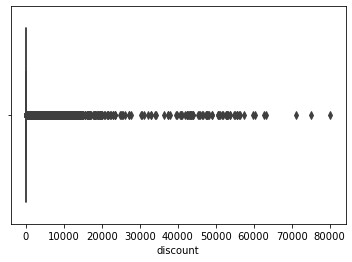

In [274]:
sns.boxplot(df_merged_edit['discount'])

In [249]:
df_merged_edit.describe()

status_description_x  average_distance  average_Delay  average_fare  \
count          3.896210e+06      3.896210e+06   3.896210e+06  3.896210e+06   
mean           3.231089e-03      8.142843e+00   7.861662e+00  3.405775e+03   
std            5.783488e-02      1.566080e+01   1.611574e+01  3.446952e+05   
min            0.000000e+00      0.000000e+00  -1.130771e+03  0.000000e+00   
25%            0.000000e+00      4.348571e+00   5.920000e+00  2.066723e+02   
50%            0.000000e+00      6.680957e+00   7.346458e+00  3.104664e+02   
75%            0.000000e+00      9.964545e+00   9.082857e+00  4.690291e+02   
max            2.000000e+00      1.955949e+04   2.365556e+04  1.786262e+08   

       average_discount  average_trip_fare         delay      distance  \
count      3.896210e+06       3.896210e+06  3.896210e+06  3.896210e+06   
mean       1.945358e+02       3.211239e+03  7.965694e+00  8.132304e+00   
std        4.347616e+04       3.419439e+05  1.728632e+01  2.361308e+01   
min        0.000000e+00       0.000000e+00  2.000000e-02  0.000000e+00   
25%        0.000000e+00       1.674575e+02  4.280000e+00  2.860000e+00   
50%        5.813953e-01       2.738757e+02  6.600000e+00  5.380000e+00   
75%        2.222222e+01       4.227131e+02  9.850000e+00  1.005000e+01   
max        1.374162e+07       1.786262e+08  9.071880e+03  3.909662e+04   

               fare      discount  ...   taximodelid     trip_fare  \
count  3.896210e+06  3.896210e+06  ...  3.896210e+06  3.896210e+06   
mean   3.404972e+03  1.942336e+02  ...  1.537426e+00  3.210739e+03   
std    1.298012e+06  2.714845e+05  ...  1.725290e+00  1.269304e+06   
min    0.000000e+00  0.000000e+00  ...  1.000000e+00  0.000000e+00   
25%    1.443000e+02  0.000000e+00  ...  1.000000e+00  1.102200e+02   
50%    2.495800e+02  0.000000e+00  ...  1.000000e+00  2.141300e+02   
75%    4.540000e+02  0.000000e+00  ...  1.000000e+00  4.057500e+02   
max    7.754609e+08  5.358780e+08  ...  2.400000e+01  7.754609e+08   

       status_description_y    pre_booked         count        tenure  \
count          3.896210e+06  3.896210e+06  3.896210e+06  3.896210e+06   
mean           4.850868e-05  1.263228e-02  3.398356e+01  6.699508e+01   
std            6.964649e-03  1.116813e-01  4.321299e+01  2.678721e+01   
min            0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
25%            0.000000e+00  0.000000e+00  9.000000e+00  5.500000e+01   
50%            0.000000e+00  0.000000e+00  2.100000e+01  7.800000e+01   
75%            0.000000e+00  0.000000e+00  4.400000e+01  8.700000e+01   
max            1.000000e+00  1.000000e+00  1.000000e+03  9.500000e+01   

       days_since_last_trip  days_since_signup  average_gaps_between_trips  \
count          3.896210e+06       3.896210e+06                3.896210e+06   
mean           4.293571e+01       5.534657e+02                3.630542e+00   
std            1.782605e+01       4.415212e+02                4.162696e+00   
min            0.000000e+00       3.100000e+01                0.000000e+00   
25%            3.200000e+01       1.250000e+02                1.000000e+00   
50%            3.500000e+01       4.300000e+02                2.000000e+00   
75%            4.600000e+01       8.940000e+02                5.000000e+00   
max            1.220000e+02       1.619000e+03                4.500000e+01   

       cancellation_rate  
count       3.896210e+06  
mean        4.904293e-05  
std         2.287522e-03  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         1.000000e+00  

[8 rows x 21 columns]

In [283]:
final_data = data.drop_duplicates(subset='passengerid')

In [284]:
final_data.shape

(463307, 16)

In [285]:
final_data = final_data.reset_index()

In [286]:
sample_data=final_data.sample(n=200000,replace="False")
sample_data.shape

(200000, 17)

In [287]:
sample_data = final_data

In [288]:
sample_data['churned'] = ""
for i in range(0,463307):
    if (sample_data['days_since_last_trip'][i]> sample_data['average_gaps_between_trips'][i] + 60):
        sample_data['churned'][i] = 'yes'
    else:
        sample_data['churned'][i] = 'no'
         

C:\Users\Sandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sandu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [289]:
final = sample_data

In [291]:
final.to_csv('final60_new.csv')

In [292]:
final['churned'].value_counts()

no     303781
yes    159526
Name: churned, dtype: int64

In [293]:
df_test = df_merged[['distance', 'fare', 'discount', 'delay','passengerid']]

# descriptive analysis

In [5]:
final = pd.read_csv('final60_new.csv')

In [6]:
final['churned'].value_counts()

no     303781
yes    159526
Name: churned, dtype: int64

[Text(0.5, 1.0, 'Churn distribution'),
 Text(0.5, 0, 'Churned'),
 Text(0, 0.5, 'Count')]

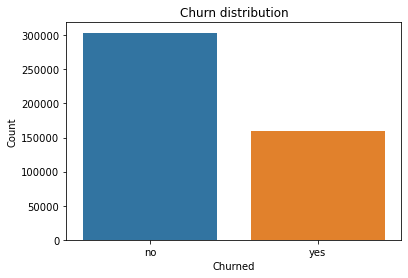

In [7]:
y = final['churned'].value_counts()
#print (y)
sns.barplot(y.index, y.values).set(title='Churn distribution',xlabel='Churned', ylabel='Count')

In [8]:
final.tail()

Unnamed: 0    index  passengerid  recent_taximodelid  \
463302      463302  3923100        39988                   3   
463303      463303  3923102       273679                  10   
463304      463304  3923191       491421                   2   
463305      463305  3923211        46478                   2   
463306      463306  3923212       107025                   1   

        recent_payment_method  status_description_x  average_distance  \
463302                    1.0                     0         35.045000   
463303                    1.0                     0          5.968764   
463304                    1.0                     0         40.466500   
463305                    1.0                     0        106.790000   
463306                    1.0                     0         31.680000   

        average_Delay  average_fare  average_discount  average_trip_fare  \
463302      38.035000   2579.870000       2579.870000               0.00   
463303      -0.367978    755.239101        755.239101               0.00   
463304      24.217000   2098.814500       2098.814500               0.00   
463305     -16.930000   5419.560000          0.000000            5419.56   
463306   23655.560000  13277.700000          0.000000           13277.70   

        travel_status  count  tenure  days_since_last_trip  days_since_signup  \
463302              1      2       6                    25                349   
463303              1     89      93                    25                392   
463304              1     20      69                    23               1121   
463305              1      1       0                    22                 35   
463306              1      2      34                     0                 34   

        average_gaps_between_trips  cancellation_rate churned  
463302                           3                0.0      no  
463303                           1                0.0      no  
463304                           3                0.0      no  
463305                           0                0.0      no  
463306                          17                0.0      no

In [9]:
final = final.drop('index', axis = 1)

In [10]:
final['recent_taximodelid'] = final['recent_taximodelid'].astype('category')
final['recent_payment_method'] = final['recent_payment_method'].astype('category')
final['status_description_x'] = final['status_description_x'].astype('category')
final['passengerid'] = final['passengerid'].astype('category')
final['travel_status'] = final['travel_status'].astype('category')

In [11]:
final.describe()

Unnamed: 0  average_distance  average_Delay  average_fare  \
count  463307.000000     463307.000000  463307.000000  4.633070e+05   
mean   231653.000000          9.858799       8.511107  2.407406e+03   
std    133745.354921         31.192900      44.116029  3.965390e+05   
min         0.000000          0.000000   -1130.771250  0.000000e+00   
25%    115826.500000          4.011041       5.180000  1.918800e+02   
50%    231653.000000          6.835000       7.183333  3.152500e+02   
75%    347479.500000         11.410000       9.770000  5.369400e+02   
max    463306.000000      19559.490000   23655.560000  1.786262e+08   

       average_discount  average_trip_fare          count         tenure  \
count      4.633070e+05       4.633070e+05  463307.000000  463307.000000   
mean       8.289393e+01       2.324512e+03       8.467852      34.487800   
std        2.019043e+04       3.960250e+05      14.735555      33.343388   
min        0.000000e+00       0.000000e+00       1.000000       0.000000   
25%        0.000000e+00       1.561461e+02       1.000000       0.000000   
50%        0.000000e+00       2.812500e+02       3.000000      27.000000   
75%        1.666667e+01       4.906156e+02       9.000000      68.000000   
max        1.374162e+07       1.786262e+08    1000.000000      95.000000   

       days_since_last_trip  days_since_signup  average_gaps_between_trips  \
count         463307.000000      463307.000000               463307.000000   
mean              58.796181         456.646321                    4.815520   
std               26.496064         408.962930                    6.322184   
min                0.000000          31.000000                    0.000000   
25%               36.000000         112.000000                    0.000000   
50%               49.000000         312.000000                    3.000000   
75%               78.000000         717.000000                    7.000000   
max              122.000000        1619.000000                   45.000000   

       cancellation_rate  
count      463307.000000  
mean            0.000049  
std             0.005404  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000

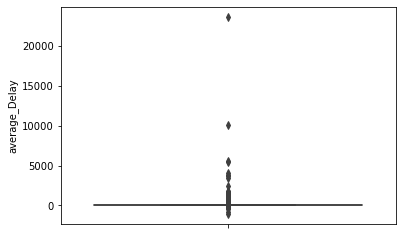

In [12]:
# average delay

sns.boxplot(y=final["average_Delay"] );
plt.show()

In [13]:
final = final[final['average_Delay']<10000]

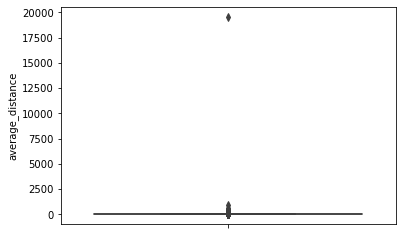

In [14]:
# average distance

sns.boxplot(y=final["average_distance"] );
plt.show()

In [15]:
# examine the outlier

final[final["average_distance"]>17500]

# cannot remove since the distance also high. but remove it considering as an extreme value

Unnamed: 0 passengerid recent_taximodelid recent_payment_method  \
90333       90333      165893                  2                   1.0   

      status_description_x  average_distance  average_Delay  average_fare  \
90333                    0          19559.49           12.2     919373.73   

       average_discount  average_trip_fare travel_status  count  tenure  \
90333               0.0          919373.73             1      2       0   

       days_since_last_trip  days_since_signup  average_gaps_between_trips  \
90333                    86               1262                           0   

       cancellation_rate churned  
90333                0.0     yes

In [16]:
final = final[final["average_distance"]<17500]

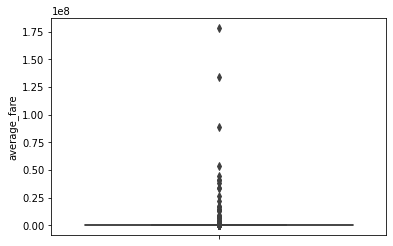

In [17]:
# average fare

sns.boxplot(y=final["average_fare"] );
plt.show()

In [18]:
# examine the outliers

final[final["average_fare"]>75000000]

# The average are is two high when considering the average distance travelled. 

Unnamed: 0 passengerid recent_taximodelid recent_payment_method  \
138415      138415      278657                  1                   1.0   
142186      142186       32244                  1                   1.0   
282460      282460       25240                  1                   1.0   

       status_description_x  average_distance  average_Delay  average_fare  \
138415                    0          8.135000         7.9400  8.931329e+07   
142186                    0          6.333333         8.5100  1.786262e+08   
282460                    0          2.882500         6.9775  1.339696e+08   

        average_discount  average_trip_fare travel_status  count  tenure  \
138415              25.0       8.931327e+07             1      6      49   
142186               0.0       1.786262e+08             1      3       1   
282460              62.5       1.339695e+08             1      4      56   

        days_since_last_trip  days_since_signup  average_gaps_between_trips  \
138415                    70                725                           8   
142186                    69                180                           0   
282460                    42               1350                          14   

        cancellation_rate churned  
138415                0.0     yes  
142186                0.0     yes  
282460                0.0      no

In [19]:
# examining according to original values
df_test[df_test['passengerid'] == 278657]

NameError: name 'df_test' is not defined

In [20]:
df_test[df_test['passengerid'] == 32244]

NameError: name 'df_test' is not defined

In [21]:
df_test[df_test['passengerid'] == 25240]

NameError: name 'df_test' is not defined

In [22]:
# Thus the outliers can be removed

final = final[final["average_fare"]<75000000]

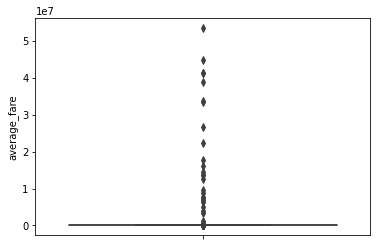

In [23]:
# average fare

sns.boxplot(y=final["average_fare"] );
plt.show()

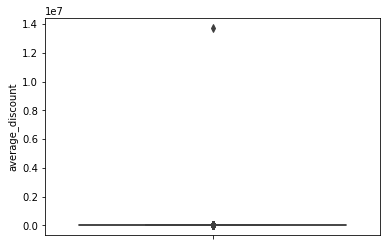

In [24]:
# average discount

sns.boxplot(y=final["average_discount"] );
plt.show()

In [25]:
final[final["average_discount"]>12000000]

Unnamed: 0 passengerid recent_taximodelid recent_payment_method  \
400473      400473      159120                  1                   1.0   

       status_description_x  average_distance  average_Delay  average_fare  \
400473                    0         31.591795       5.393333   13742179.58   

        average_discount  average_trip_fare travel_status  count  tenure  \
400473      1.374162e+07         560.010256             1     39      52   

        days_since_last_trip  days_since_signup  average_gaps_between_trips  \
400473                    33                220                           1   

        cancellation_rate churned  
400473                0.0      no

In [26]:
df_test[df_test['passengerid'] == 159120]

NameError: name 'df_test' is not defined

In [27]:
# this person have received high discounts for most of the travels. But, considering the whole population and the gap between
# the other values, this value was discarded considering as an extreme value

final = final[final["average_discount"]<12000000]

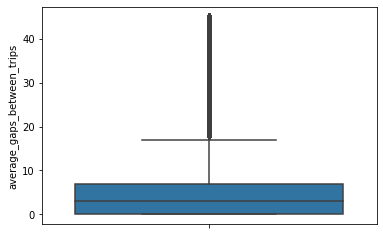

In [28]:
# average gaps betweeb trips

sns.boxplot(y=final["average_gaps_between_trips"] );
plt.show()

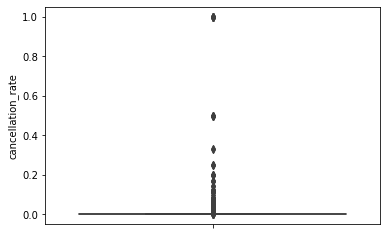

In [29]:
# cancellation_rate

sns.boxplot(y=final["cancellation_rate"] );
plt.show()

[Text(0.5, 1.0, 'status description distribution'),
 Text(0.5, 0, 'status'),
 Text(0, 0.5, 'Count')]

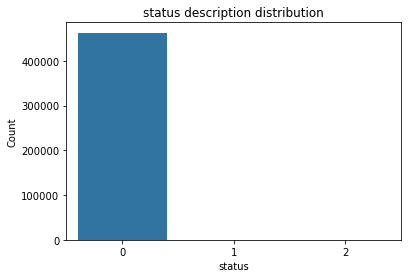

In [30]:
# status_description
y = final['status_description_x'].value_counts()

sns.barplot(y.index, y.values).set(title='status description distribution',xlabel='status', ylabel='Count')

In [31]:
final['status_description_x'].value_counts()

0    463094
1       201
2         5
Name: status_description_x, dtype: int64

In [32]:
# most of the trips are complated. Only a few are cancelled

[Text(0.5, 1.0, 'taxi mode distribution'),
 Text(0.5, 0, 'taxi mode'),
 Text(0, 0.5, 'Count')]

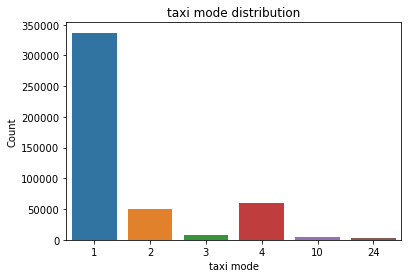

In [33]:
# recent taxi mode
y = final['recent_taximodelid'].value_counts()

sns.barplot(y.index, y.values).set(title='taxi mode distribution',xlabel='taxi mode', ylabel='Count')

[Text(0.5, 1.0, 'payment mode distribution'),
 Text(0.5, 0, 'payment mode'),
 Text(0, 0.5, 'Count')]

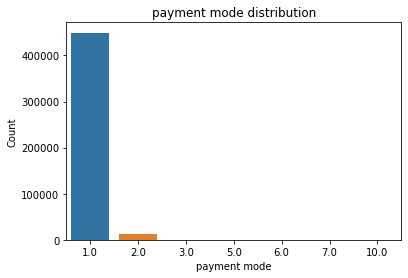

In [34]:
# recent payment mode
y = final['recent_payment_method'].value_counts()

sns.barplot(y.index, y.values).set(title='payment mode distribution',xlabel='payment mode', ylabel='Count')

# Bivariate analysis

Counter({'no': 303777, 'yes': 159523})


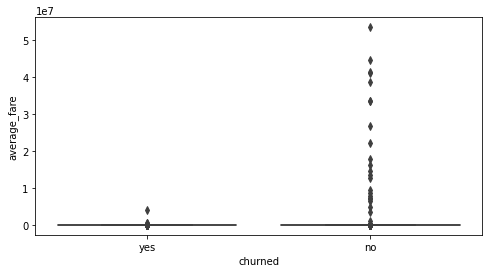

In [35]:
# Distribution of churn with average fare
plt.figure(figsize=(8,4))
sns.boxplot(x= final['churned'], y = final['average_fare'])
print(Counter(final['churned'].values))

plt.show()

Counter({'no': 303777, 'yes': 159523})


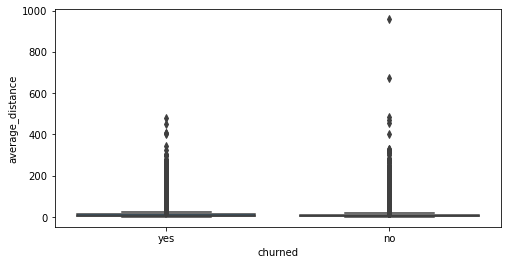

In [36]:
# Distribution of churn with average distance
plt.figure(figsize=(8,4))
sns.boxplot(x= final['churned'], y = final['average_distance'])
print(Counter(final['churned'].values))

plt.show()

Counter({'no': 303777, 'yes': 159523})


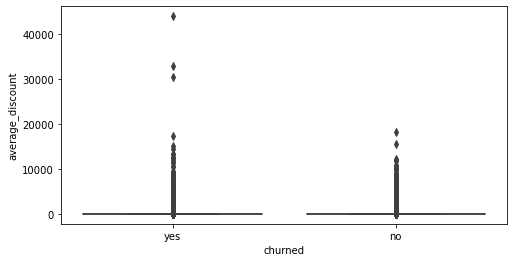

In [37]:
# Distribution of churn with average discount
plt.figure(figsize=(8,4))
sns.boxplot(x= final['churned'], y = final['average_discount'])
print(Counter(final['churned'].values))

plt.show()

In [38]:
delay = final[final['average_Delay']>0]

Counter({'no': 301994, 'yes': 157433})


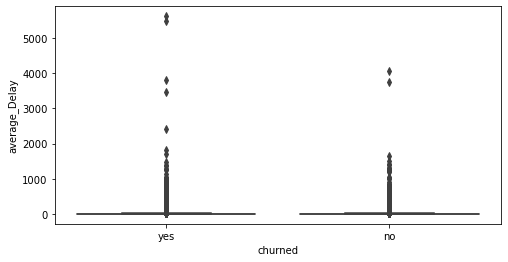

In [39]:
# Distribution of churn with average delay
plt.figure(figsize=(8,4))
sns.boxplot(x= delay['churned'], y = delay['average_Delay'])
print(Counter(delay['churned'].values))

plt.show()

Counter({'no': 303777, 'yes': 159523})


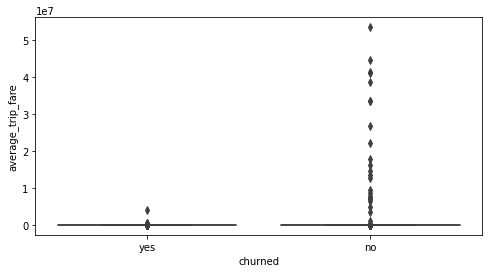

In [40]:
# Distribution of churn with average trip fare
plt.figure(figsize=(8,4))
sns.boxplot(x= final['churned'], y = final['average_trip_fare'])
print(Counter(final['churned'].values))

plt.show()

Text(0.5, 1.0, 'churned with respect to recent_payment_method')

<Figure size 432x288 with 0 Axes>

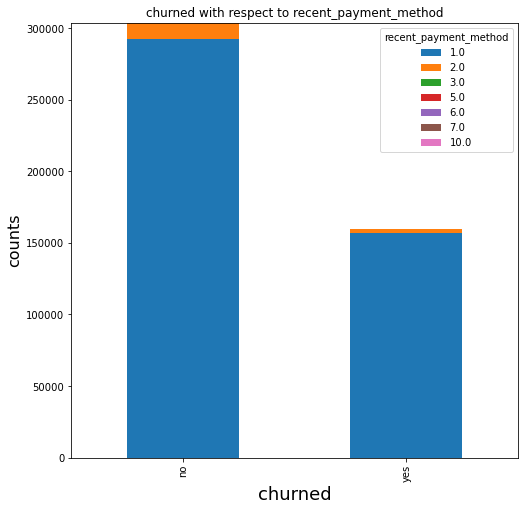

In [41]:
table = pd.crosstab(index=final["churned"], 
                          columns=final["recent_payment_method"])
fig = plt.figure()

fig = table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


plt.xlabel('churned', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.title('churned with respect to recent_payment_method')

Text(0.5, 1.0, 'churned with respect to recent_taximodelid')

<Figure size 432x288 with 0 Axes>

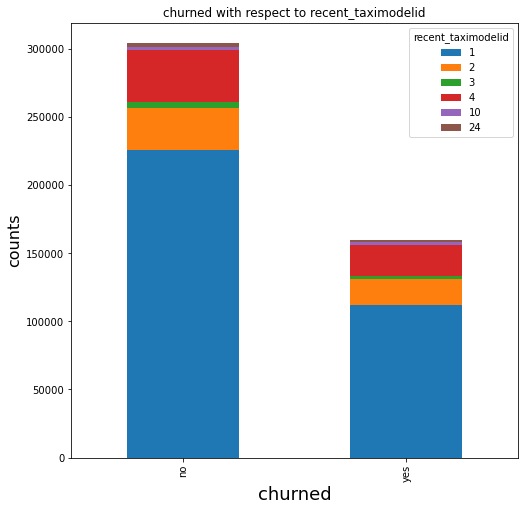

In [42]:
table = pd.crosstab(index=final["churned"], 
                          columns=final["recent_taximodelid"])
fig = plt.figure()

fig = table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


plt.xlabel('churned', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.title('churned with respect to recent_taximodelid')

In [43]:
final.head()

Unnamed: 0 passengerid recent_taximodelid recent_payment_method  \
0           0      280716                  1                   1.0   
1           1      196868                  1                   1.0   
2           2       86895                  1                   1.0   
3           3      303246                  4                   1.0   
4           4      451701                  4                   1.0   

  status_description_x  average_distance  average_Delay  average_fare  \
0                    0              4.09          12.27        169.44   
1                    0              7.32          17.55        298.61   
2                    0             15.70          10.30        632.78   
3                    0             12.61          21.32        639.17   
4                    0              7.23          14.07        379.08   

   average_discount  average_trip_fare travel_status  count  tenure  \
0               0.0             169.44             1      1       0   
1               0.0             298.61             1      1       0   
2               0.0             632.78             1      1       0   
3               0.0             639.17             1      1       0   
4               0.0             379.08             1      1       0   

   days_since_last_trip  days_since_signup  average_gaps_between_trips  \
0                   122                196                           0   
1                   122                595                           0   
2                   122                425                           0   
3                   122               1390                           0   
4                   122                467                           0   

   cancellation_rate churned  
0                0.0     yes  
1                0.0     yes  
2                0.0     yes  
3                0.0     yes  
4                0.0     yes

Text(0.5, 1.0, 'churned with respect to travel_status')

<Figure size 432x288 with 0 Axes>

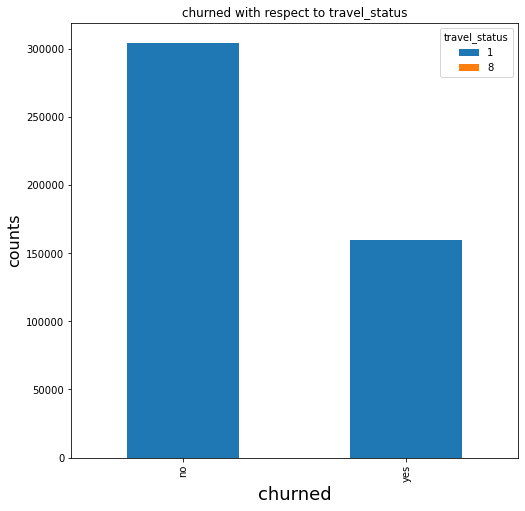

In [44]:
table = pd.crosstab(index=final["churned"], 
                          columns=final["travel_status"])
fig = plt.figure()

fig = table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


plt.xlabel('churned', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.title('churned with respect to travel_status')

Counter({'no': 303777, 'yes': 159523})


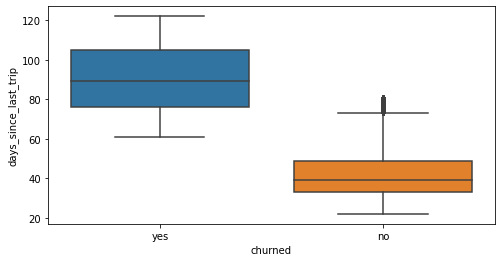

In [45]:
# Distribution of churn with days_since_last_trip
plt.figure(figsize=(8,4))
sns.boxplot(x= final['churned'], y = final['days_since_last_trip'])
print(Counter(final['churned'].values))

plt.show()

Counter({'no': 303777, 'yes': 159523})


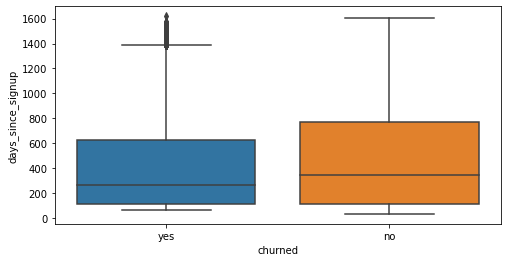

In [46]:
# Distribution of churn with days_since_signup
plt.figure(figsize=(8,4))
sns.boxplot(x= final['churned'], y = final['days_since_signup'])
print(Counter(final['churned'].values))

plt.show()

Counter({'no': 303777, 'yes': 159523})


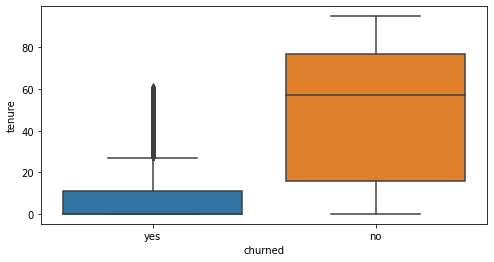

In [47]:
# Distribution of churn with tenure
plt.figure(figsize=(8,4))
sns.boxplot(x= final['churned'], y = final['tenure'])
print(Counter(final['churned'].values))

plt.show()

Counter({'no': 303777, 'yes': 159523})


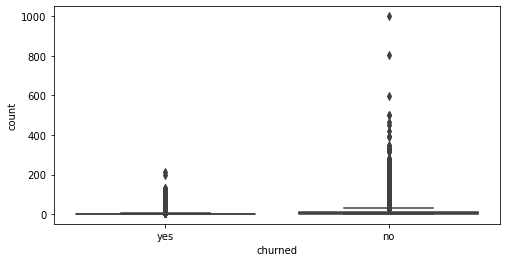

In [48]:
# Distribution of churn with count
plt.figure(figsize=(8,4))
sns.boxplot(x= final['churned'], y = final['count'])
print(Counter(final['churned'].values))

plt.show()

Counter({'no': 303777, 'yes': 159523})


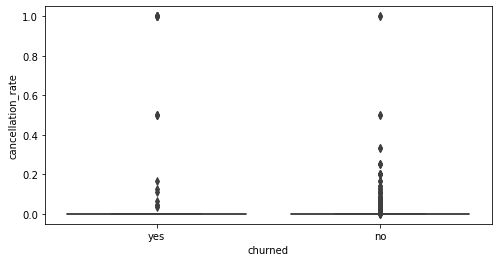

In [49]:
# Distribution of churn with cancellation_rate
plt.figure(figsize=(8,4))
sns.boxplot(x= final['churned'], y = final['cancellation_rate'])
print(Counter(final['churned'].values))

plt.show()

# Advanced analysis

In [50]:
cleanup_nums = {"churned":     {"yes": 1, "no": 0}}
final.replace(cleanup_nums, inplace=True)

In [51]:
final.head()

Unnamed: 0 passengerid recent_taximodelid recent_payment_method  \
0           0      280716                  1                   1.0   
1           1      196868                  1                   1.0   
2           2       86895                  1                   1.0   
3           3      303246                  4                   1.0   
4           4      451701                  4                   1.0   

  status_description_x  average_distance  average_Delay  average_fare  \
0                    0              4.09          12.27        169.44   
1                    0              7.32          17.55        298.61   
2                    0             15.70          10.30        632.78   
3                    0             12.61          21.32        639.17   
4                    0              7.23          14.07        379.08   

   average_discount  average_trip_fare travel_status  count  tenure  \
0               0.0             169.44             1      1       0   
1               0.0             298.61             1      1       0   
2               0.0             632.78             1      1       0   
3               0.0             639.17             1      1       0   
4               0.0             379.08             1      1       0   

   days_since_last_trip  days_since_signup  average_gaps_between_trips  \
0                   122                196                           0   
1                   122                595                           0   
2                   122                425                           0   
3                   122               1390                           0   
4                   122                467                           0   

   cancellation_rate  churned  
0                0.0        1  
1                0.0        1  
2                0.0        1  
3                0.0        1  
4                0.0        1

In [62]:
dataset = final.drop(['passengerid', 'travel_status', 'status_description_x', 'Unnamed: 0', 
                      'average_gaps_between_trips', 'days_since_last_trip'], axis = 1)

In [63]:
dataset.head()

recent_taximodelid recent_payment_method  average_distance  average_Delay  \
0                  1                   1.0              4.09          12.27   
1                  1                   1.0              7.32          17.55   
2                  1                   1.0             15.70          10.30   
3                  4                   1.0             12.61          21.32   
4                  4                   1.0              7.23          14.07   

   average_fare  average_discount  average_trip_fare  count  tenure  \
0        169.44               0.0             169.44      1       0   
1        298.61               0.0             298.61      1       0   
2        632.78               0.0             632.78      1       0   
3        639.17               0.0             639.17      1       0   
4        379.08               0.0             379.08      1       0   

   days_since_signup  cancellation_rate  churned  
0                196                0.0        1  
1                595                0.0        1  
2                425                0.0        1  
3               1390                0.0        1  
4                467                0.0        1

In [64]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(dataset, test_size=0.20) 
len(train),len(test)

(370640, 92660)

In [65]:
x = dataset.drop("churned", axis=1)
y = dataset["churned"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(y_train.value_counts())
print(y_test.value_counts())

0    242886
1    127754
Name: churned, dtype: int64
0    60891
1    31769
Name: churned, dtype: int64


In [66]:
X, y = make_classification(n_samples=1000, n_features=4,     n_informative=2, n_redundant=0,    random_state=0, shuffle=False)

In [58]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [59]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [61]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [67]:
#Obtaining feature imporance and classification accuracy using a confusion matrix

def get_feature_importance(model, features):
    if not hasattr(model, "coef_") and not hasattr(model, "feature_importances_"):
        raise Exception("Not possible to collect feature importances")

    if hasattr(model, "coef_"):
        model_feature_importances = model.coef_[0]
    elif hasattr(model, "feature_importances_"):
        model_feature_importances = model.feature_importances_

    return [
        (feature, importance)
        for feature, importance in sorted(zip(features, model_feature_importances),
            key=lambda pair: pair[1],
            reverse=True,
        )
    ]


def run_model(X_train, y_train, X_test, y_test, model):

    model.fit(X_train, y_train)
    
    # performance on the train set
    predictions = model.predict(X_train)
    train_results = {
        "prec": precision_score(y_train, predictions),
        "rec": recall_score(y_train, predictions),
        "roc": roc_auc_score(y_train, predictions),
    }
    cm_train = confusion_matrix(y_train, predictions)

    # test set
    predictions = model.predict(X_test)
    #print('true',y_test)
    #print('pred',predictions)

    test_results = {
        "prec": precision_score(y_test, predictions),
        "rec": recall_score(y_test, predictions),
        "roc": roc_auc_score(y_test, predictions),
    }

    cm_test = confusion_matrix(y_test, predictions)
    
    feature_importance = get_feature_importance(model, X_train.columns.values)
    return {
        "model": model, 
        "cm_train": cm_train, 
        "train_results" : train_results, 
        "cm_test" : cm_test, 
        "test_results" : test_results,
        "feature_importance" : feature_importance,
        "y_true": y_test,
        "y_pred": predictions
    }

from sklearn.metrics import classification_report

def print_result(result, fi=True):
    print("training set")
    print(result["train_results"])
    print(result["cm_train"])
    print("Results in the test set")
    print(result["test_results"])
    print(result["cm_test"])
    
    print("Report:")
    print(classification_report(result["y_true"],result["y_pred"]))
   
    
    if fi:
        print("Feature importances")
        pd_fi = pd.DataFrame(result["feature_importance"], columns=["feature", "importance"])
        pd_fi = pd_fi[(pd_fi.importance > 0)]
        p = plt.barh(pd_fi["feature"], pd_fi["importance"])
        print(p)

C:\Users\Sandu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sandu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training set
{'prec': 0.0, 'rec': 0.0, 'roc': 0.5}
[[242886      0]
 [127754      0]]
Results in the test set
{'prec': 0.0, 'rec': 0.0, 'roc': 0.5}
[[60891     0]
 [31769     0]]
Report:


C:\Users\Sandu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.66      1.00      0.79     60891
           1       0.00      0.00      0.00     31769

    accuracy                           0.66     92660
   macro avg       0.33      0.50      0.40     92660
weighted avg       0.43      0.66      0.52     92660

Feature importances
<BarContainer object of 0 artists>


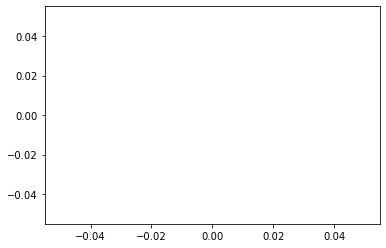

In [68]:
# logistic regression 


result = run_model(X_train, y_train, X_test, y_test,LogisticRegression(random_state=0,
                                                                        solver='saga'))
print_result(result)

In [ ]:
# logistic regression with lasso penalty which is a regularization techniques which helps to select features

# Set pd_fi = pd_fi[(pd_fi.importance > 0.00001)], in print results since its very low for LR
result = run_model(X_train, y_train, X_test, y_test,LogisticRegression(random_state=42,penalty='l2',
                                                                        solver='saga'))
print_result(result)

C:\Users\Sandu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sandu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samp

training set
{'prec': 0.0, 'rec': 0.0, 'roc': 0.5}
[[242886      0]
 [127754      0]]
Results in the test set
{'prec': 0.0, 'rec': 0.0, 'roc': 0.5}
[[60891     0]
 [31769     0]]
Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     60891
           1       0.00      0.00      0.00     31769

    accuracy                           0.66     92660
   macro avg       0.33      0.50      0.40     92660
weighted avg       0.43      0.66      0.52     92660

Feature importances
<BarContainer object of 1 artists>


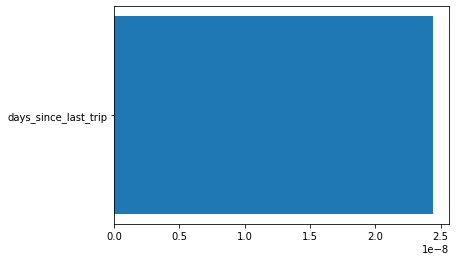

In [470]:
# logistic regression with ridge penalty which is a regularization techniques which helps to select features

# Set pd_fi = pd_fi[(pd_fi.importance > 0.00001)], in print results since its very low for LR
result = run_model(X_train, y_train, X_test, y_test,LogisticRegression(random_state=0,penalty='l1',
                                                                        solver='saga'))
print_result(result)

In [ ]:
# SVM 

result = run_model(X_train, y_train, X_test, y_test,svm.SVC(kernel='rbf'))
print_result(result)

In [ ]:
# SVM 

result = run_model(X_train, y_train, X_test, y_test,svm.SVC(kernel='linear'))
print_result(result)

training set
{'prec': 0.9999921725177097, 'rec': 1.0, 'roc': 0.9999979414210781}
[[242885      1]
 [     0 127754]]
Results in the test set
{'prec': 0.7385048144541816, 'rec': 0.8594541848972268, 'roc': 0.8503393339949832}
[[51223  9668]
 [ 4465 27304]]
Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     60891
           1       0.74      0.86      0.79     31769

    accuracy                           0.85     92660
   macro avg       0.83      0.85      0.84     92660
weighted avg       0.86      0.85      0.85     92660

Feature importances
<BarContainer object of 11 artists>


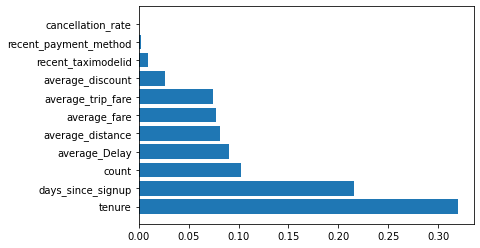

In [69]:
# Random forest

result = run_model(X_train, y_train, X_test, y_test,RandomForestClassifier(random_state=42))
print_result(result)

training set
{'prec': 0.7351294228328039, 'rec': 0.8929974795309736, 'roc': 0.8618808531849511}
[[201781  41105]
 [ 13670 114084]]
Results in the test set
{'prec': 0.7316732964818928, 'rec': 0.8916239101010419, 'roc': 0.8605119928229339}
[[50503 10388]
 [ 3443 28326]]
Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     60891
           1       0.73      0.89      0.80     31769

    accuracy                           0.85     92660
   macro avg       0.83      0.86      0.84     92660
weighted avg       0.87      0.85      0.85     92660

Feature importances
<BarContainer object of 9 artists>


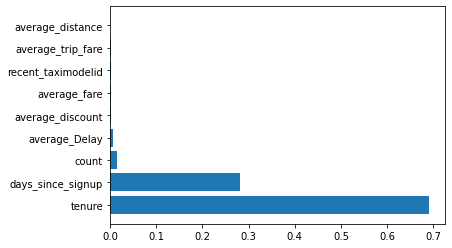

In [70]:
# Gradient boost classifier

result = run_model(X_train, y_train, X_test, y_test,GradientBoostingClassifier(random_state=0))
print_result(result)

## correlation between categorical features

In [441]:
import itertools
import scipy.stats as ss

In [442]:
cols = ['recent_taximodelid', 'recent_payment_method', 'churned']

In [443]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [444]:
cols = cols
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(final[col1], final[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

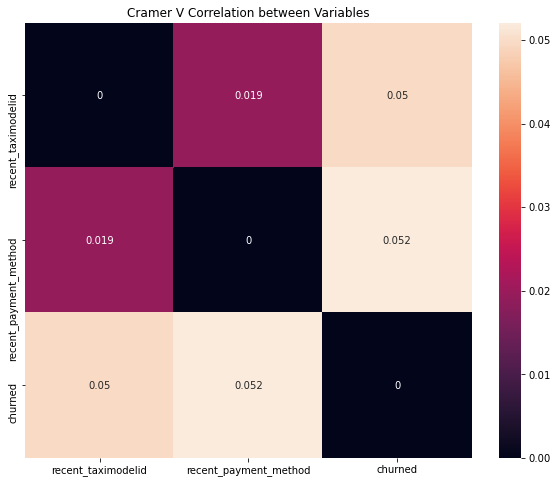

In [446]:
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [447]:
final.columns.tolist()

['Unnamed: 0',
 'passengerid',
 'recent_taximodelid',
 'recent_payment_method',
 'status_description_x',
 'average_distance',
 'average_Delay',
 'average_fare',
 'average_discount',
 'average_trip_fare',
 'travel_status',
 'count',
 'tenure',
 'days_since_last_trip',
 'days_since_signup',
 'average_gaps_between_trips',
 'cancellation_rate',
 'churned']

In [456]:
numer = final[['average_distance','average_Delay','average_fare','average_discount','average_trip_fare','count',
 'tenure','days_since_last_trip','days_since_signup','average_gaps_between_trips','cancellation_rate']]

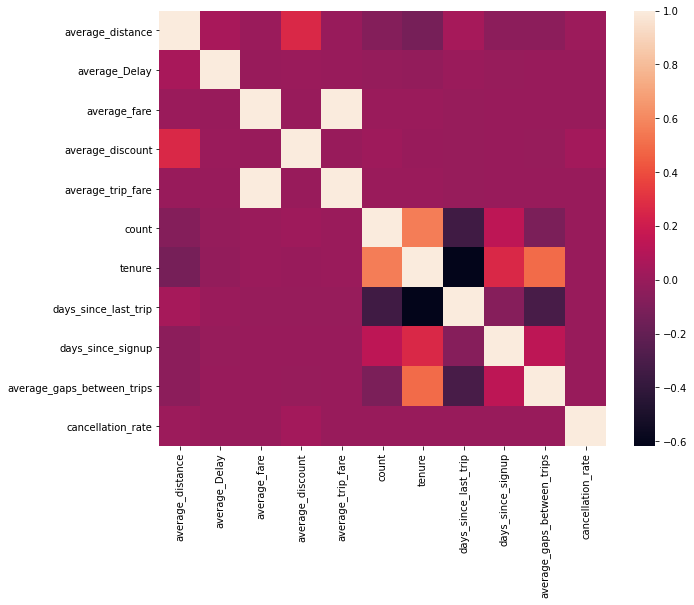

In [457]:
corr = numer.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [460]:
final.groupby('churned').mean()

Unnamed: 0  average_distance  average_Delay  average_fare  \
churned                                                                 
0        310884.614526          9.364075       8.333357   2002.533821   
1         80771.955549         10.678209       8.638143    567.066686   

         average_discount  average_trip_fare      count     tenure  \
churned                                                              
0               52.887272        1949.646473  11.462020  48.592662   
1               53.896254         513.170388   2.766121   7.628455   

         days_since_last_trip  days_since_signup  average_gaps_between_trips  \
churned                                                                        
0                   42.030417         478.778360                    6.472853   
1                   90.723425         414.496781                    1.659447   

         cancellation_rate  
churned                     
0                 0.000036  
1                 0.000073

In [465]:
pd.crosstab(final['recent_taximodelid'], final['churned'])

churned                  0       1
recent_taximodelid                
1                   225376  111540
2                    30865   19160
3                     4426    2771
4                    38201   22476
10                    2551    2222
24                    2358    1354

In [462]:
final.shape

(463300, 18)